In [13]:
#Import the required libraries
import numpy as np
import util

In [36]:
#Create a class for GDA
class GDA:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def fit(self):
        
        #Calculate mu0
        mu0 = self.calc_mu(0)
        self.mu0 = mu0
        
        #Calculate mu1
        mu1 = self.calc_mu(1)
        self.mu1 = mu1
        
        #Calculate sigma
        sigma = self.calc_sigma(0, mu0, mu1)
        self.sigma = sigma
        
        #Calculate phi
        phi = self.calc_phi()
        self.phi = phi
        
        #Calculate theta
        self.theta = self.calc_theta()
        
        
    
    
    def predict(self, x):
        
        mu0 = self.mu0
        mu1 = self.mu1
        sigma = self.sigma
        phi = self.phi
        
        px_y0 = self.prob_x_given_y(x, mu0, sigma)
        
        px_y1 = self.prob_x_given_y(x, mu1, sigma)
        
#         print("This is p: ", px_y0)
        
        
        py1_x = (px_y1*phi)/((px_y1*phi) + (px_y0*(1-phi)))
        py0_x = (px_y0*(1-phi))/((px_y1*phi) + (px_y0*(1-phi)))
        
        final_p = [x if x>y else y for x,y in zip(py1_x, py0_x)]
#         print("This is final_p: ", len(final_p))
        
        return np.array(py1_x)
        
        
    
    def prob_x_given_y(self, x, mu, sigma):
        d = x.shape[1]
        X = x - mu
        den = (np.sqrt((2 * np.pi)**d * np.linalg.det(sigma)))

        #Check the calculation of num once
        num = np.exp(-0.5*np.sum(X.dot(np.linalg.pinv(sigma))*X,axis=1))
        p = num / den
        
        return p
        
    def calc_mu(self, mu_select):
        
        #Create mask for y_train values that match the selected mu
        mask = (self.y == mu_select)
        x_select = self.x[mask]
        
        return np.mean(x_select, axis=0,)
    
    def calc_sigma(self, mu_select, mu0, mu1):

        mask = (self.y == mu_select)
    
        mu_vector = np.zeros(self.x.shape) 
        for i in range(mu_vector.shape[1]):
            mu_vector[:,i] = [(lambda x: mu0[i] if(each_val == True) else mu1[i])(each_val) for each_val in mask]
        
        x_mu_diff = self.x - mu_vector        
        sigma = np.dot(x_mu_diff.T,x_mu_diff)        
        n = self.x.shape[0]
        sigma = (1/n)*sigma
        
        return sigma
    
    #Function to calculate phi
    def calc_phi(self):
        return self.y.mean()
    
        #Masking example
#         mask = (a % 3 == 0)
#         extract_from_a = a[mask]

    #Function to calculate theta
    def calc_theta(self):
        
        mu0 = self.mu0
        mu1 = self.mu1
        sigma = self.sigma
        phi = self.phi
        
        S=np.linalg.inv(sigma)
        theta12=S.dot(mu1-mu0).flatten()
        a=mu0.T.dot(S.dot(mu0))
        b=mu1.T.dot(S.dot(mu1))
        print("This is a-b: ", a-b)
        theta0=1/2*(a-b)-np.log((1-phi)/phi)

        return np.array([theta0, theta12[0],theta12[1]])
        


In [37]:
# Load dataset
train_path = "ds1_train.csv"
x_train, y_train = util.load_dataset(train_path, add_intercept=False)

In [38]:
#Create an object of GDA class
myGDA = GDA(x_train, y_train)
myGDA.fit()
myGDA.predict(x_train)

This is a-b:  -4.208750175044813


array([1.92490200e-01, 5.00552261e-01, 1.31885835e-01, 5.32024192e-02,
       1.57187973e-01, 1.05983988e-02, 2.37057400e-01, 1.57553440e-01,
       1.60092227e-01, 6.22052363e-02, 2.18649417e-01, 7.28805470e-01,
       8.42804302e-02, 1.86838162e-01, 2.56829180e-02, 3.88144657e-02,
       1.45520295e-01, 4.04101848e-01, 1.18268615e-01, 1.04584330e-01,
       4.25140758e-01, 2.90856615e-02, 1.04550999e-01, 7.76534431e-01,
       2.05746212e-01, 5.06854120e-01, 3.47521794e-02, 5.76565015e-01,
       5.53972697e-01, 1.00594277e-01, 4.16063433e-02, 6.54067764e-02,
       1.37920062e-02, 1.34447237e-02, 2.39476413e-01, 6.32364315e-02,
       5.55879192e-02, 5.79591758e-02, 4.62945668e-01, 2.63424347e-01,
       3.61193504e-01, 8.57686776e-01, 6.44064482e-01, 2.22567320e-01,
       8.42790069e-01, 1.20671437e-01, 5.24036963e-01, 1.97931849e-01,
       3.46800194e-03, 4.32132245e-01, 5.17030924e-01, 2.29833725e-02,
       1.08787485e-01, 1.20154770e-01, 1.20967293e-01, 2.08976496e-02,
      

In [39]:
valid_path = "ds1_valid.csv"
save_path = "gda_pred_1.txt"

This is p_eval:  [0.06883937 0.56024162 0.32435375 0.05848448 0.41755176 0.12390238
 0.98729331 0.25196125 0.04193341 0.23041272 0.81288577 0.06210079
 0.15401955 0.21171665 0.86350661 0.05148282 0.24906271 0.45848758
 0.87219572 0.16210448 0.2106486  0.03454002 0.28827052 0.51692353
 0.11626297 0.37151518 0.29529587 0.02485325 0.02175873 0.13841534
 0.03369386 0.08888053 0.03196613 0.26657034 0.80887685 0.47774256
 0.06244028 0.74274542 0.12838012 0.04311939 0.28774625 0.68626246
 0.0881443  0.09594478 0.757264   0.03472131 0.22583904 0.07910966
 0.06193536 0.36494122 0.94527459 0.25460637 0.89670446 0.59924448
 0.63287566 0.9332731  0.4622048  0.40233401 0.64030283 0.81625328
 0.81671735 0.7061523  0.18676206 0.91253704 0.85455796 0.79767618
 0.78826527 0.88696067 0.4725732  0.84518692 0.96427857 0.3772556
 0.66453123 0.55539667 0.78113325 0.90521591 0.8830094  0.64465659
 0.9507067  0.31034609 0.16599224 0.99248461 0.82836421 0.91690607
 0.61805529 0.84331562 0.82672529 0.67817299 0

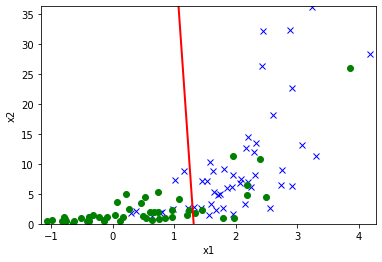

In [40]:
# Plot decision boundary on validation set
x_eval, y_eval = util.load_dataset(valid_path, add_intercept=False)

plot_path = save_path.replace('.txt', '.png')
util.plot(x_eval, y_eval, myGDA.theta, plot_path)
# x_eval = util.add_intercept(x_eval)



# Use np.savetxt to save outputs from validation set to save_path
p_eval = myGDA.predict(x_eval)
print("This is p_eval: ", p_eval)
print("This is type of p_eval: ", type(p_eval))
yhat = p_eval > 0.5
print('GDA Accuracy: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
np.savetxt(save_path, p_eval)